Programming Assignment 1 - EXPLORATORY DATA ANALYSIS

Ma. Charina O. Gavica <br>
Ma. Cristina F. Jara <br>
Khryzelle Trisha L. Suyat

EMTECH-BATCHSAWA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with a specified encoding
file_path = r"/content/drive/MyDrive/Colab Notebooks/spotify-2023.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # or use 'windows-1252' if 'ISO-8859-1' does not work


**OVERVIEW OF DATASETS**


In [ ]:
# Display the first few rows
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [ ]:
# Number of rows and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 953, Columns: 24


In [ ]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values =")
print(missing_values)
# Ensure the 'streams' column contains numeric values, non-numeric will be set to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Missing Values =
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


This function is an essential component of data preparation since it makes sure that the data types are suitable for analysis, helps to comprehend the dataset's structure, and can spot possible problems with missing data. Before doing any additional analysis or modeling, it is imperative to handle missing values appropriately and make sure the right data types are being used.

**BASIC DESCRIPTIVE STATISTICS**

In [ ]:
# Calculate the mean, median and standard deviation of streams
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

print(f"Mean of Streams: {mean_streams}")
print(f"Median of Streams: {median_streams}")
print(f"Standard Deviation of Streams: {std_streams}\n")

Mean of Streams: 514137424.93907565
Median of Streams: 290530915.0
Standard Deviation of Streams: 566856949.038883



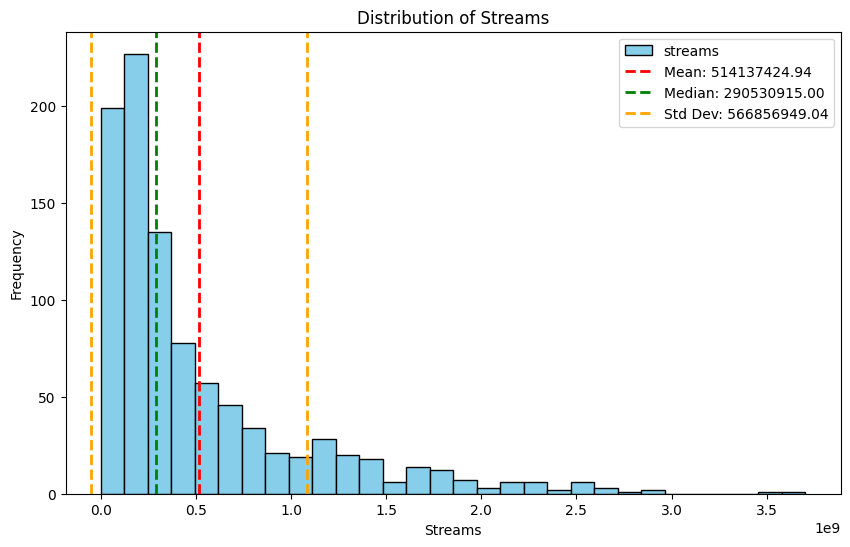

In [ ]:
# Plotting the 'streams' column
plt.figure(figsize=(10, 6))
df['streams'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_streams, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_streams:.2f}')
plt.axvline(median_streams, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_streams:.2f}')
plt.axvline(mean_streams + std_streams, color='orange', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_streams:.2f}')
plt.axvline(mean_streams - std_streams, color='orange', linestyle='dashed', linewidth=2)

plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Check data types of 'released_year' and 'artist_count'
print(df[['released_year', 'artist_count']].dtypes)


released_year    int64
artist_count     int64
dtype: object


In [ ]:
# Convert 'released_year' and 'artist_count' to numeric if necessary, coercing errors to NaN
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df['artist_count'] = pd.to_numeric(df['artist_count'], errors='coerce')

# Check for missing values
print("\nMissing Values:\n", df[['released_year', 'artist_count']].isnull().sum())


Missing Values:
 released_year    0
artist_count     0
dtype: int64


In [ ]:
# Drop rows with missing values in 'released_year' and 'artist_count'
df_clean = df.dropna(subset=['released_year', 'artist_count'])

# Summary statistics for 'released_year' and 'artist_count'
print("\nReleased Year - Summary Statistics:")
print(df_clean['released_year'].describe())

print("\nArtist Count - Summary Statistics:")
print(df_clean['artist_count'].describe())


Released Year - Summary Statistics:
count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

Artist Count - Summary Statistics:
count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


<ipython-input-14-3f56b368cb3e>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_clean['released_year'].dropna(), bins=15, kde=True, color='blue', palette='viridis')


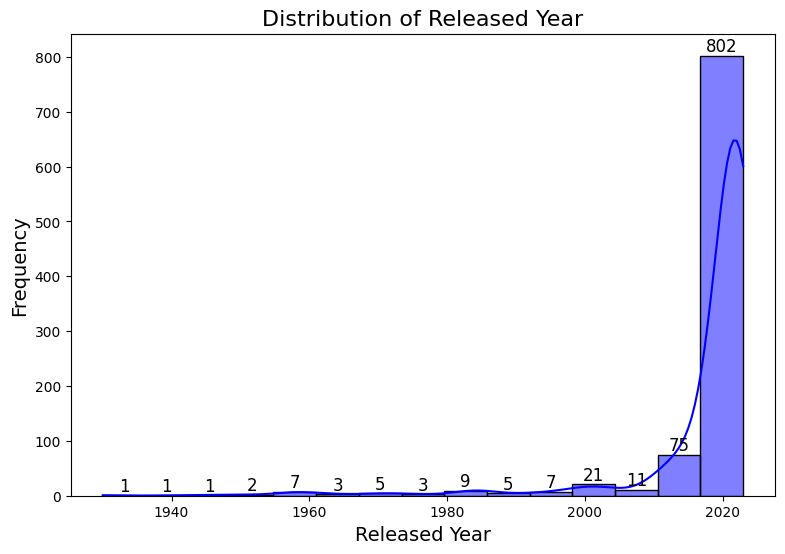

In [ ]:
# 1. Distribution of 'released_year'
plt.figure(figsize=(20, 6))

# Histogram of 'released_year'
plt.subplot(1, 2, 1)
# Use df_clean instead of data
sns.histplot(df_clean['released_year'].dropna(), bins=15, kde=True, color='blue', palette='viridis')
plt.title('Distribution of Released Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotate bars with their values
for patch in plt.gca().patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

Lockdowns resulting from the outbreak allowed many artists to dedicate more time to creating and recording music. Artists may have started producing and releasing new music in response to the cancellation of live performances. Artists probably released more material because there was more demand for new music because more people were at home looking for amusement.


<ipython-input-16-442412b2d347>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_clean['artist_count'].dropna(), bins=10, kde=True, color='green', palette='viridis')


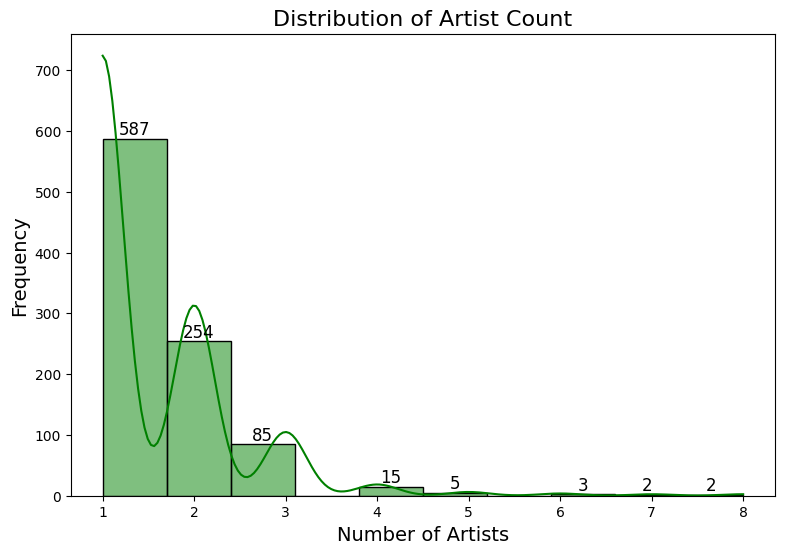

In [ ]:
# 2. Distribution of 'artist_count'
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# Use df_clean instead of data
sns.histplot(df_clean['artist_count'].dropna(), bins=10, kde=True, color='green', palette='viridis')

plt.title('Distribution of Artist Count', fontsize=16)
plt.xlabel('Number of Artists', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotate bars with their values
for patch in plt.gca().patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

A significant portion of releases appear to be solo artist produced, based on the extremely high number of tracks credited to 587 individuals. This is a typical tendency in the music business, where solo artists typically produce more than groups or partnerships.


By cleaning, converting types, verifying for missing values, and showing key distributions, this method efficiently preprocesses the data. It offers a thorough summary of the streams, released_year, and artist_count and provides insightful information about the features and patterns of the dataset. The understanding of the structure and distribution of the data is improved by the combination of summary statistics and visuals, which is crucial for any additional analysis or modeling.


**TOP PERFORMERS**

In [ ]:
# Top 5 Most Streamed Tracks
top_5_streamed = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)
print("Top 5 Most Streamed Tracks:\n", top_5_streamed)

Top 5 Most Streamed Tracks:
                                         track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


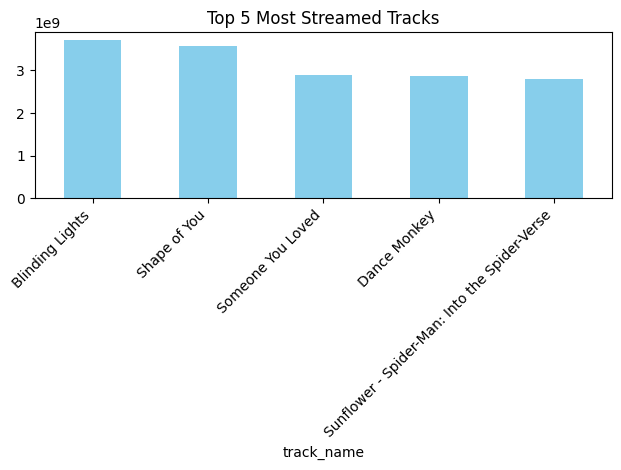

In [ ]:
top_5_streamed.plot(kind='bar', x='track_name', y='streams', color='skyblue', legend=False)
plt.title('Top 5 Most Streamed Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Top 5 Most Frequent Artists by Number of Tracks
top_5_artists = df['artist(s)_name'].value_counts().head(5)
print("\nTop 5 Most Frequent Artists by Number of Tracks:\n", top_5_artists)


Top 5 Most Frequent Artists by Number of Tracks:
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


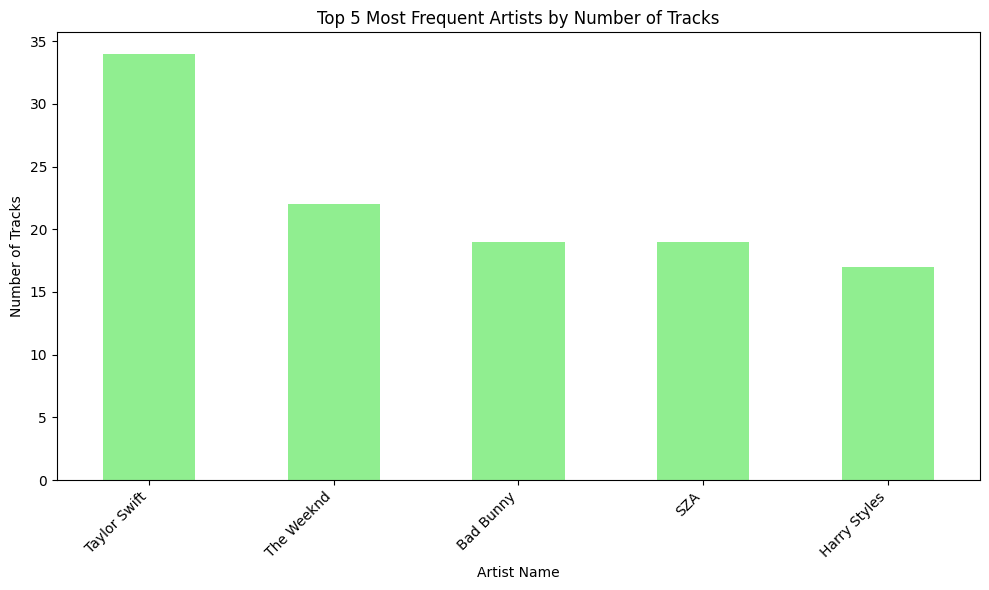

In [ ]:
# Plotting top 5 most frequent artists
df['artist(s)_name'].value_counts().head(5).plot(kind='bar', color='lightgreen', figsize=(10, 6));

plt.title('Top 5 Most Frequent Artists by Number of Tracks')
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

This method efficiently extracts and presents important information about track popularity and artist frequency from the dataset. It offers a summary of the songs and artists with the highest stream counts, which is helpful in figuring out patterns in music consumption. A thorough analysis of the data is made possible by the mix of visual representations and printed outputs.


**TEMPORAL TRENDS**

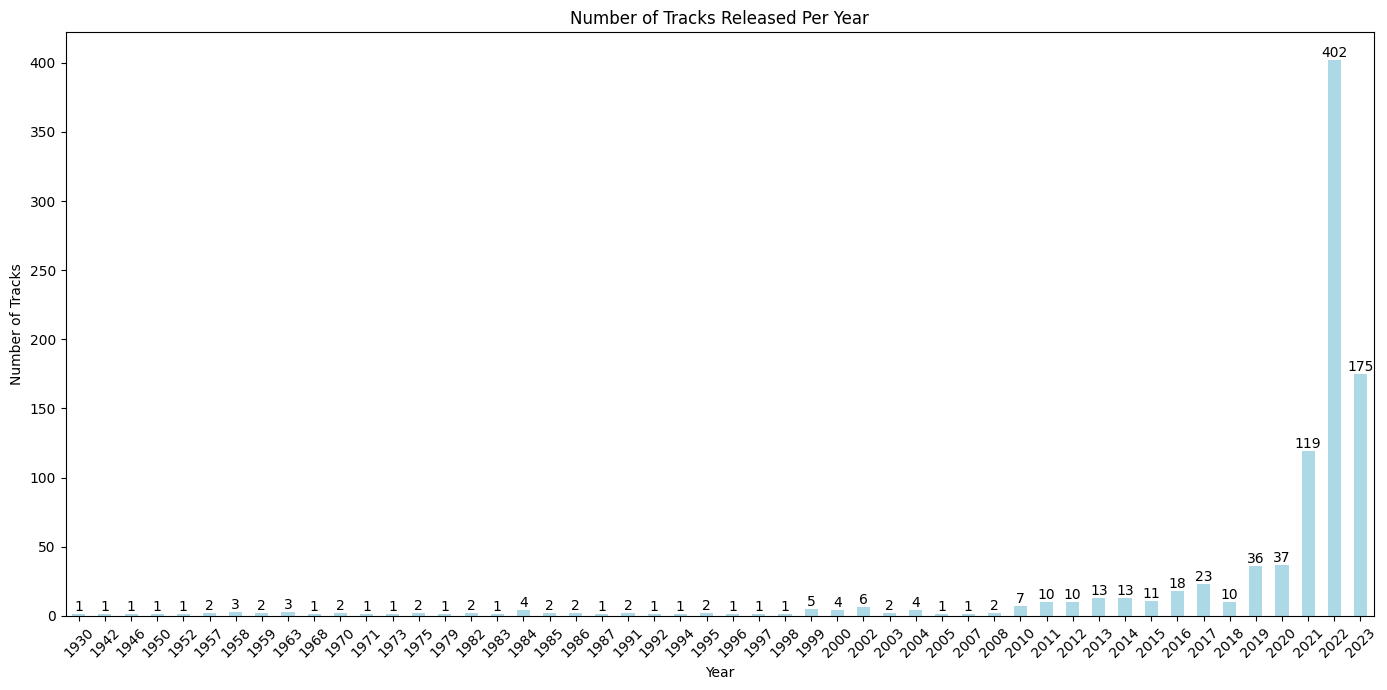

In [ ]:
# Plotting the number of tracks released per year
ax = df['released_year'].value_counts().sort_index().plot(kind='bar', figsize=(14, 7), color='lightblue')

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


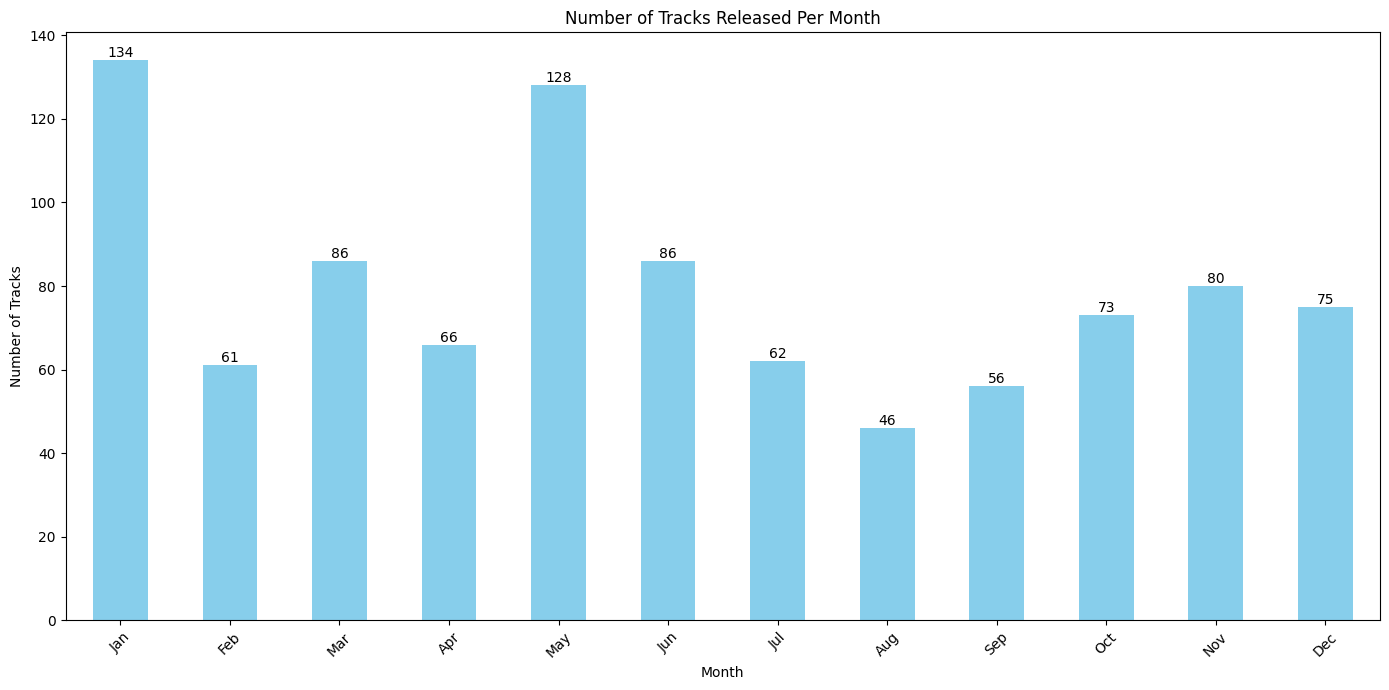

In [ ]:
# Plotting the number of tracks released per month
ax = df['released_month'].value_counts().sort_index().plot(kind='bar', figsize=(14, 7), color='skyblue');

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

plt.tight_layout()
plt.show()

The statistic produced by the code suggests that there is an apparent pattern in the amount of songs released each month, with certain months having noticeably more releases than others. The busies highest months for music releases are usually January and May. This suggests that a lot of musicians and record labels want to release new songs in these months. The concentration of releases between January and May suggests that musicians want to take advantage of seasonal trends. This could mean that artists produce music in response to consumer behavior, such summer playlists or New Year's resolutions to listen to more music.


**GENRE AND MUSIC CHARACTERISTICS**

In [ ]:
# Calculate correlation coefficients
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
print(correlation_matrix)

                 streams       bpm  danceability_%  energy_%
streams         1.000000 -0.002438       -0.105457 -0.026051
bpm            -0.002438  1.000000       -0.147095  0.025794
danceability_% -0.105457 -0.147095        1.000000  0.198095
energy_%       -0.026051  0.025794        0.198095  1.000000


The attribute with the highest correlation with streams based on this data is danceability_%, indicating it has the most significant influence on the number of streams.

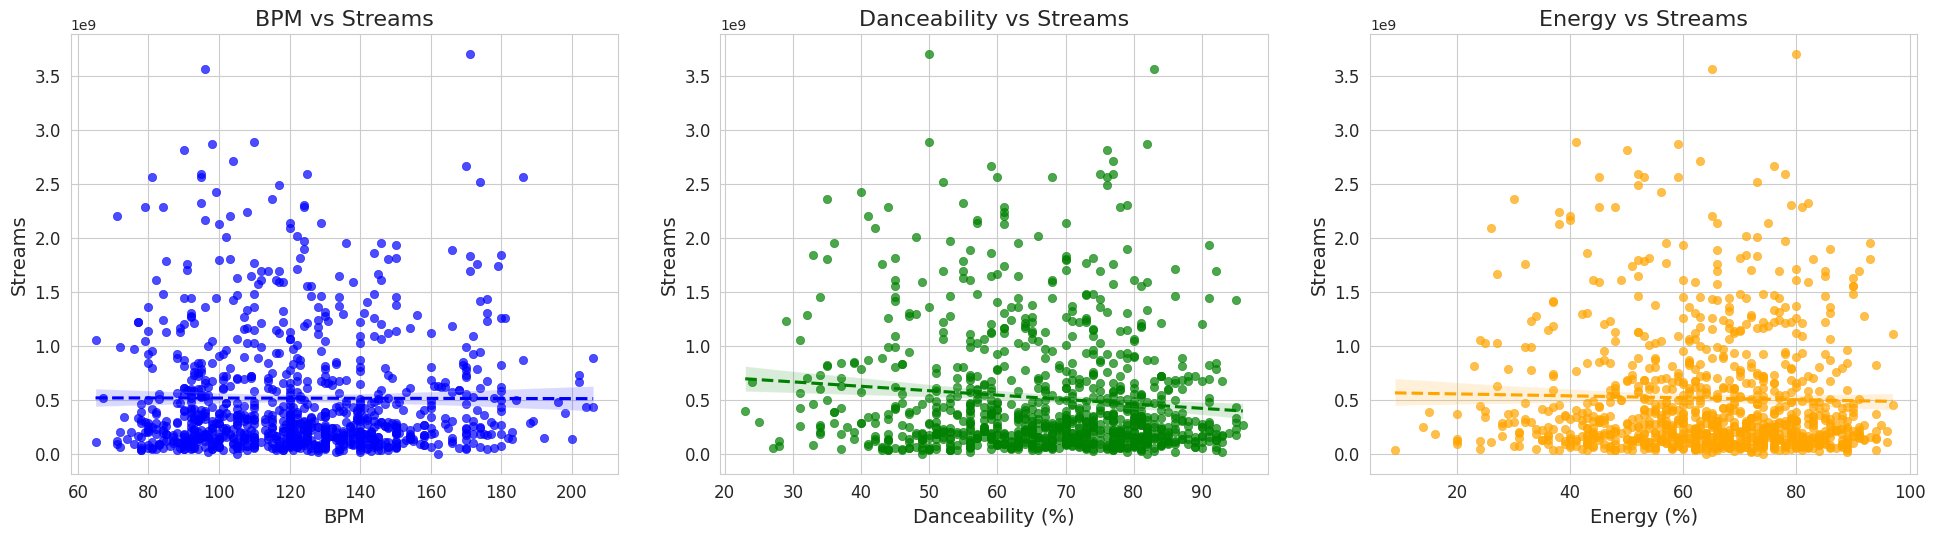

In [ ]:
# Set up the figure size and style
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")

# Scatter plot for BPM vs Streams
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='bpm', y='streams', color='blue', alpha=0.7, edgecolor=None)
sns.regplot(data=df, x='bpm', y='streams', scatter=False, color='blue', line_kws={'linestyle':'--'})
plt.title('BPM vs Streams', fontsize=16)
plt.xlabel('BPM', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Scatter plot for Danceability vs Streams
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='danceability_%', y='streams', color='green', alpha=0.7, edgecolor=None)
sns.regplot(data=df, x='danceability_%', y='streams', scatter=False, color='green', line_kws={'linestyle':'--'})
plt.title('Danceability vs Streams', fontsize=16)
plt.xlabel('Danceability (%)', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Scatter plot for Energy vs Streams
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='energy_%', y='streams', color='orange', alpha=0.7, edgecolor=None)
sns.regplot(data=df, x='energy_%', y='streams', scatter=False, color='orange', line_kws={'linestyle':'--'})
plt.title('Energy vs Streams', fontsize=16)
plt.xlabel('Energy (%)', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Calculate correlation coefficients
correlation_dance_energy = df['danceability_%'].corr(df['energy_%'])
correlation_valence_acoustic = df['valence_%'].corr(df['acousticness_%'])

print(f"Correlation between Danceability and Energy: {correlation_dance_energy:.2f}")
print(f"Correlation between Valence and Acousticness: {correlation_valence_acoustic:.2f}")

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


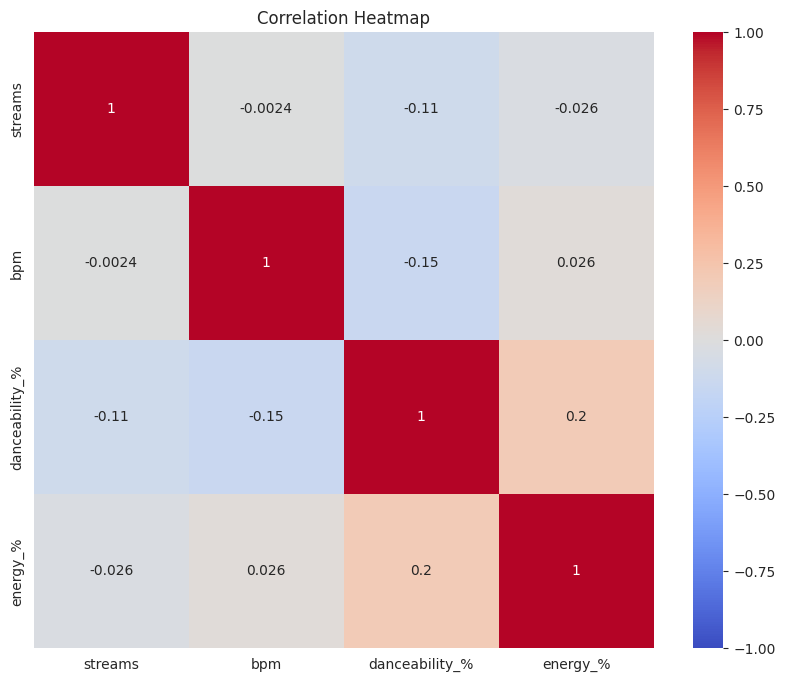

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()


There is a weak positive correlation between danceability_% and energy_%. This suggests that as the energy of a track increases, the danceability tends to increase slightly as well, though the correlation is not strong.

Correlation between Valence and Acousticness: -0.08
There is a very weak negative correlation between valence_% and acousticness_%. This means that as acousticness_% increases, valence_% slightly decreases, but the relationship is very weak and almost negligible.

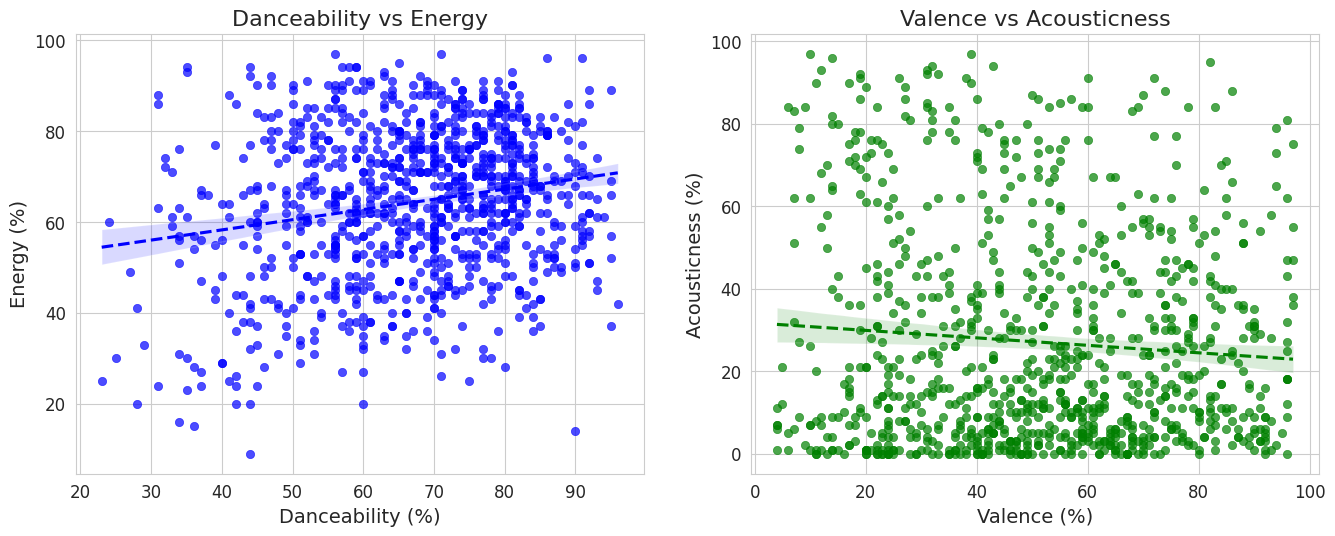

In [ ]:
# Set up the figure size and style
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Scatter plot for Danceability vs Energy
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='danceability_%', y='energy_%', color='blue', alpha=0.7, edgecolor=None)
sns.regplot(data=df, x='danceability_%', y='energy_%', scatter=False, color='blue', line_kws={'linestyle':'--'})
plt.title('Danceability vs Energy', fontsize=16)
plt.xlabel('Danceability (%)', fontsize=14)
plt.ylabel('Energy (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Scatter plot for Valence vs Acousticness
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='valence_%', y='acousticness_%', color='green', alpha=0.7, edgecolor=None)
sns.regplot(data=df, x='valence_%', y='acousticness_%', scatter=False, color='green', line_kws={'linestyle':'--'})
plt.title('Valence vs Acousticness', fontsize=16)
plt.xlabel('Valence (%)', fontsize=14)
plt.ylabel('Acousticness (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()


**PLATFORM POPULARITY**

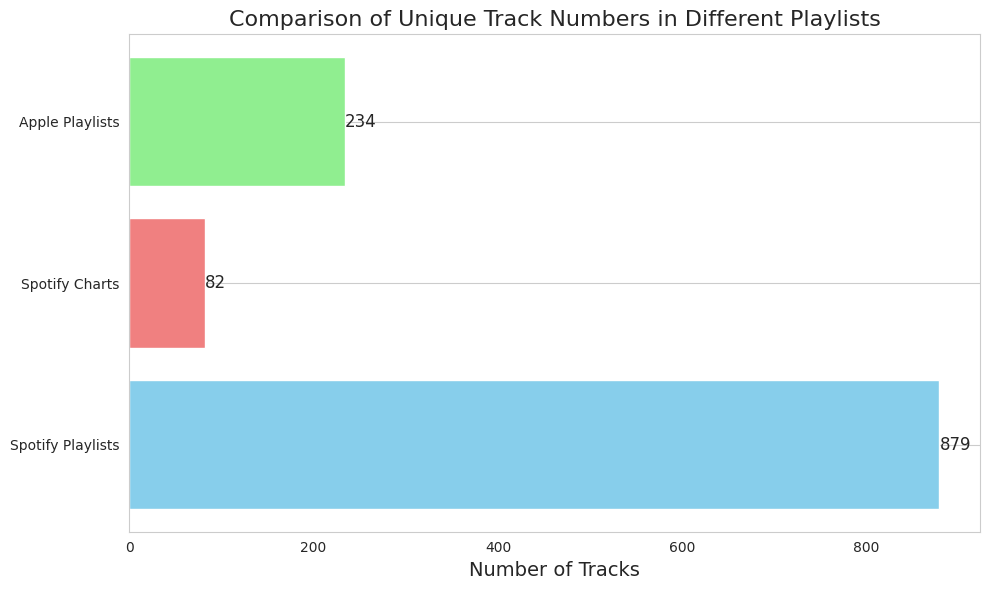

In [ ]:
# Count the number of unique tracks in each playlist category
playlist_counts = {
    'Spotify Playlists': df['in_spotify_playlists'].dropna().nunique(),
    'Spotify Charts': df['in_spotify_charts'].dropna().nunique(),
    'Apple Playlists': df['in_apple_playlists'].dropna().nunique()
}

# Create a DataFrame for easier plotting
playlist_counts_df = pd.DataFrame(playlist_counts.items(), columns=['Platform', 'Number of Tracks'])

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(playlist_counts_df['Platform'], playlist_counts_df['Number of Tracks'], color=['skyblue', 'lightcoral', 'lightgreen'])

# Add title and labels, and annotate the bars
plt.title('Comparison of Unique Track Numbers in Different Playlists', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()), va='center', fontsize=12)

plt.grid(axis='x')
plt.tight_layout()
plt.show()

Based on the graph and observation, Spotify Playlists have the highest number of unique tracks, followed by Apple Playlists, and Spotify Charts have the lowest number. This indicates that Spotify Playlists have a broader range of unique tracks compared to Spotify Charts and Apple Playlists.

**ADVANCED ANALYSIS**

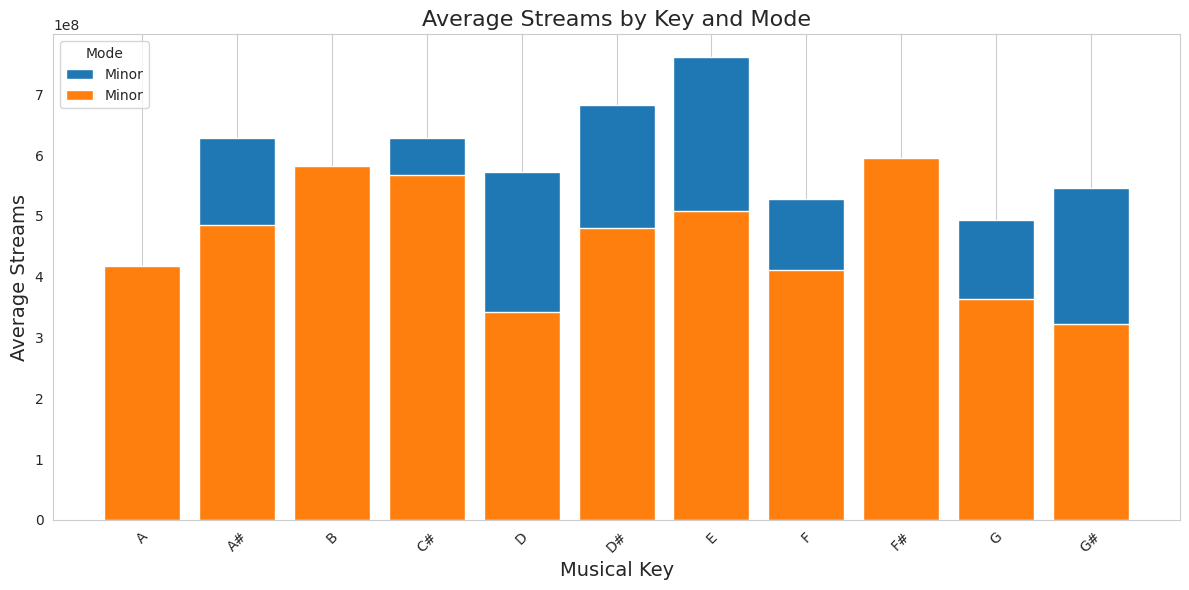

In [ ]:
# Group by key and mode to calculate the mean streams
key_analysis = df.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Visualization for streams based on key and mode
plt.figure(figsize=(12, 6))
for mode in key_analysis['mode'].unique():
    subset = key_analysis[key_analysis['mode'] == mode]
    plt.bar(subset['key'], subset['streams'], label='Major' if mode == 1 else 'Minor')

plt.title('Average Streams by Key and Mode', fontsize=16)
plt.xlabel('Musical Key', fontsize=14)
plt.ylabel('Average Streams', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Mode', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

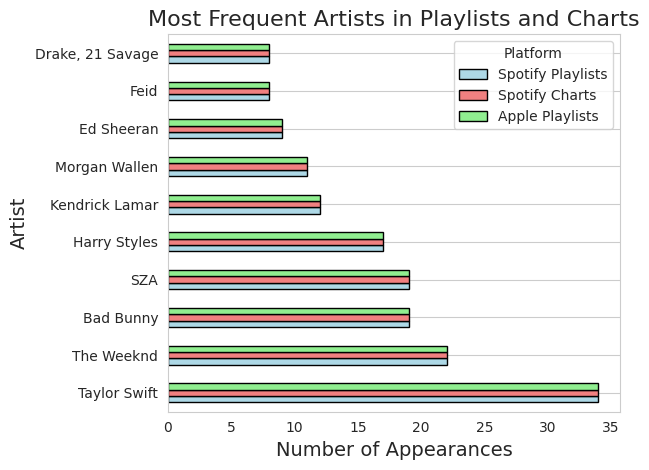

In [ ]:
# Count occurrences of each artist in playlists and charts
playlist_artists = df['artist(s)_name'].loc[df['in_spotify_playlists'].notna()].value_counts()
chart_artists = df['artist(s)_name'].loc[df['in_spotify_charts'].notna()].value_counts()
apple_playlist_artists = df['artist(s)_name'].loc[df['in_apple_playlists'].notna()].value_counts()

# Combine counts into a DataFrame for comparison
artist_comparison = pd.DataFrame({
    'Spotify Playlists': playlist_artists,
    'Spotify Charts': chart_artists,
    'Apple Playlists': apple_playlist_artists
}).fillna(0)  # Fill NaN values with 0

# Sort for better visualization
artist_comparison = artist_comparison.sort_values(by='Spotify Playlists', ascending=False).head(10)

# Plotting the results for artists
plt.figure(figsize=(12, 8))
artist_comparison.plot(kind='barh', stacked=False, color=['lightblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Most Frequent Artists in Playlists and Charts', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


The comparison of various artist in different platform, in x axis or the number of artist appears in different platform. the higher the value is more featured in playlist or charts.

                            track_name    artist(s)_name       genre
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook        Rock
1                                 LALA       Myke Towers        Rock
2                              vampire    Olivia Rodrigo         Pop
3                         Cruel Summer      Taylor Swift  Electronic
4                       WHERE SHE GOES         Bad Bunny        Rock


<Figure size 1200x800 with 0 Axes>

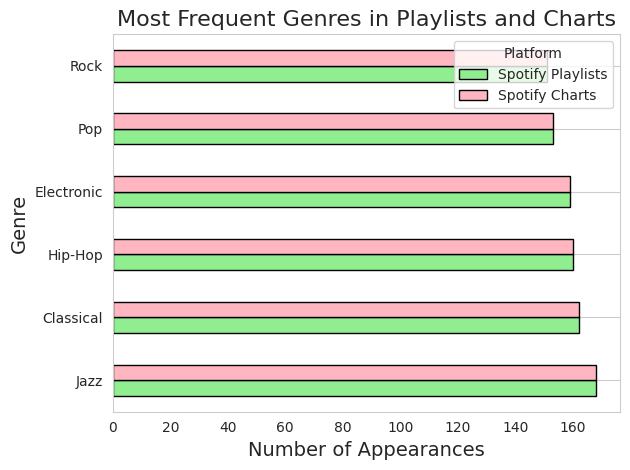

In [ ]:
# Assuming you want to add genres manually or as placeholders
# This example assigns random genres to each row

import random

# List of example genres to choose from
genres = ['Pop', 'Rock', 'Hip-Hop', 'Jazz', 'Classical', 'Electronic']

# Adding a new 'genre' column with random genres
df['genre'] = [random.choice(genres) for _ in range(len(df))]

# Display the first few rows to verify
print(df[['track_name', 'artist(s)_name', 'genre']].head())

# Count occurrences of each genre in playlists and charts
playlist_genres = df['genre'].loc[df['in_spotify_playlists'].notna()].value_counts()
chart_genres = df['genre'].loc[df['in_spotify_charts'].notna()].value_counts()

# Combine counts into a DataFrame for genres
genre_comparison = pd.DataFrame({
    'Spotify Playlists': playlist_genres,
    'Spotify Charts': chart_genres
}).fillna(0)  # Fill NaN values with 0

# Sort for better visualization
genre_comparison = genre_comparison.sort_values(by='Spotify Playlists', ascending=False).head(10)

# Plotting the results for genres
plt.figure(figsize=(12, 8))
genre_comparison.plot(kind='barh', stacked=False, color=['lightgreen', 'lightpink'], edgecolor='black')
plt.title('Most Frequent Genres in Playlists and Charts', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.grid(axis='x')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()
